**Problem Statement**

Sales teams often lack a clear, data-driven understanding of regional performance, making it difficult to identify growth opportunities and optimize resources. This project aims to analyse and visualize regional sales data to uncover trends, evaluate profitability, and support strategic decision-making.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
sheets=pd.read_excel('/content/Regional Sales Dataset For Project.xlsx',sheet_name=None)

In [161]:
#Assigning dataframe to sheets
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2024 Budgets']


In [162]:
df_sales.shape

(61383, 12)

In [163]:
df_sales.sample(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
45921,SO - 0008782,2024-02-10,48,Distributor,USD,REG291,150,5,6,2626.4,15758.4,1785.952
52066,SO - 000832,2024-07-13,42,Wholesale,USD,STG930,247,13,10,2010.0,20100.0,884.400
10657,SO - 0003334,2021-09-20,150,Wholesale,USD,FLR024,120,25,11,1969.8,21667.8,1575.840
58123,SO - 0002268,2024-12-11,111,Wholesale,USD,STG930,290,14,8,3946.3,31570.4,1894.224
36457,SO - 0009234,2023-06-19,121,Wholesale,USD,REG291,168,4,8,1112.2,8897.6,556.100


In [164]:
df_products.sample(5)

,Index,Product Name
27,28,Product 28
12,13,Product 13
22,23,Product 23
15,16,Product 16
5,6,Product 6


In [165]:
df_state_reg.iloc[0:5]

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [166]:
df_state_reg.columns = df_state_reg.iloc[0]
df_state_reg = df_state_reg[1:]
df_state_reg.reset_index(drop=True, inplace=True)
df_state_reg.columns = ["State Code", "State", "Region"]

In [167]:
df_state_reg.iloc[0:5]

,State Code,State,Region
0,AL,Alabama,South
1,AZ,Arizona,West
2,CA,California,West
3,CO,Colorado,West
4,DC,District of Columbia,South


In [168]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [169]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [170]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


**Data Cleanign and Wrangling**

In [171]:
# Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [172]:
# Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [173]:
# Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [174]:
# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [175]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [176]:
# Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
]
df = df.drop(columns=cols_to_drop, errors='ignore')

In [186]:
df.sample(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,Region,2024 Budgets
46211,SO - 0003997,2024-02-17,102,Wholesale,USD,REG291,152,25,12,5701.7,...,33.98307,-118.09674,562.0,64218.0,16606.0,55752.0,21485451.0,1518018.0,West,5342315.484
29188,SO - 0004983,2022-12-20,122,Wholesale,USD,REG291,498,11,11,2452.2,...,38.31527,-85.83185,812.0,50145.0,19859.0,46329.0,99744029.0,1266016.0,Midwest,1230458.484
8986,SO - 0008561,2021-08-12,35,Distributor,USD,REG291,714,3,5,1005.0,...,40.78788,-74.01431,551.0,53366.0,19161.0,45370.0,2575149.0,864403.0,Northeast,2642352.432
50892,SO - 0010740,2024-06-13,4,Distributor,USD,DSN392,457,4,8,3966.4,...,39.80172,-89.64371,217.0,116565.0,50575.0,49868.0,155637192.0,16272442.0,Midwest,2885560.824
58505,SO - 0007377,2024-12-20,83,Wholesale,USD,DSN392,821,25,11,1092.1,...,40.62642,-75.36790,610.0,74892.0,29144.0,47291.0,49473428.0,906820.0,Northeast,5342315.484


In [187]:
# Converting all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'region',
       '2024 budgets'], dtype=object)

In [188]:
# DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2024 budgets'        # budget target for this product in 2024
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2024 budgets'     : 'budget'          # 2024 budget target (float)
})

# Display the cleaned DataFrame structure
df.sample(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
52874,SO - 0007126,2024-08-02,Pacific Ltd,Distributor,Product 13,10,1855.9,18559.0,1113.540,TN,Tennessee,South,35.84562,-86.39027,3720639.645
16678,SO - 0009557,2022-02-14,Snaptags Ltd,Wholesale,Product 4,7,2264.6,15852.2,1789.034,CA,California,West,33.83141,-118.28202,2885560.824
61003,SO - 0002928,2025-02-19,Cogidoo Company,Distributor,Product 5,9,254.6,2291.4,190.950,AL,Alabama,South,32.60986,-85.48078,3925424.542
23091,SO - 0002458,2022-07-25,SAFEWAY Ltd,Wholesale,Product 19,6,2452.2,14713.2,1422.276,NJ,New Jersey,Northeast,40.91677,-74.17181,1645841.600
19255,SO - 0002069,2022-04-20,Skinder Group,Export,Product 25,11,5661.5,62276.5,2321.215,IN,Indiana,Midwest,39.96548,-86.14837,5342315.484


In [216]:
df.columns.values

array(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'cost',
       'state', 'state_name', 'us_region', 'lat', 'lon', 'total_cost',
       'profit', 'profit_margin_pct', 'order_month_name',
       'order_month_num', 'order_month'], dtype=object)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55464 entries, 0 to 61382
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       55464 non-null  object        
 1   order_date         55464 non-null  datetime64[ns]
 2   customer_name      55464 non-null  object        
 3   channel            55464 non-null  object        
 4   product_name       55464 non-null  object        
 5   quantity           55464 non-null  int64         
 6   unit_price         55464 non-null  float64       
 7   revenue            55464 non-null  float64       
 8   cost               55464 non-null  float64       
 9   state              55464 non-null  object        
 10  state_name         55464 non-null  object        
 11  us_region          55464 non-null  object        
 12  lat                55464 non-null  float64       
 13  lon                55464 non-null  float64       
 14  total_cost 

**Feature Engineering**

In [218]:
#  Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

#  Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

#  Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

#  Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

#  Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

#  Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,10946.058,4048.542,27.0,January,1,2021-01
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,13969.098,11899.602,46.0,January,1,2021-01
2,SO - 0005126,2021-01-01,AeroLink Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,4108.440,1760.760,30.0,January,1,2021-01
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,7201.964,9166.136,56.0,January,1,2021-01
5,SO - 0010394,2021-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Minnesota,Midwest,44.91330,-93.50329,47652.209,9760.091,17.0,January,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61378,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,11765.736,10022.664,46.0,February,2,2025-02
61379,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,3474.486,1711.314,33.0,February,2,2025-02
61380,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,29133.610,14349.390,33.0,February,2,2025-02
61381,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,20511.246,7206.654,26.0,February,2,2025-02


# **Exploratory Analysis**
 **Monthly Sales Trend Over Time**

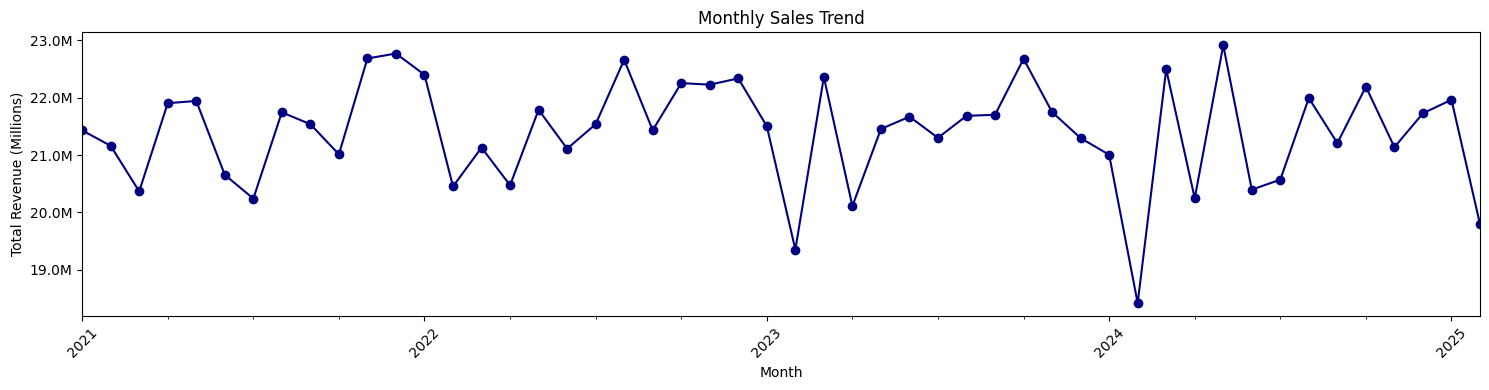

In [199]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

**Monthly Sales Trend (All Years Combined)**

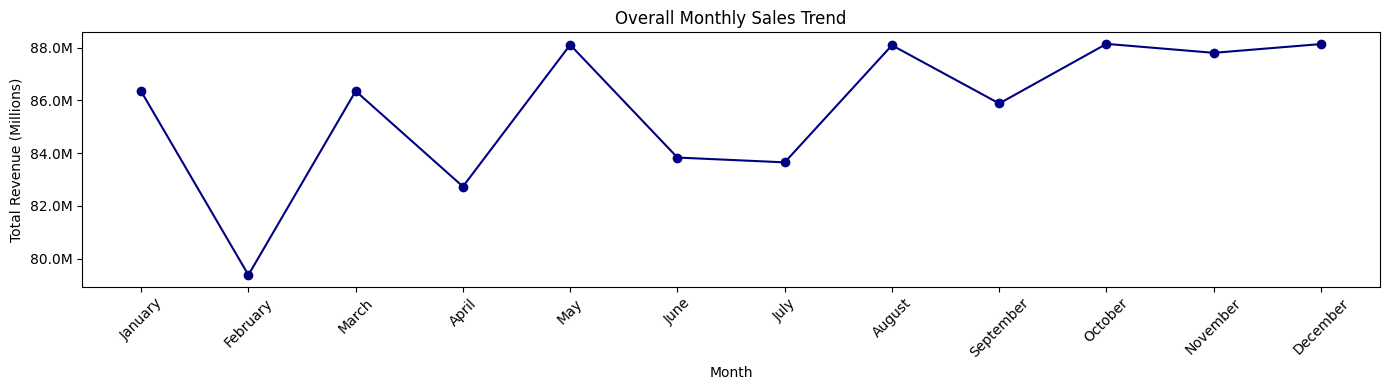

In [202]:
# Filter out any 2025 orders
tf= df[df['order_date'].dt.year != 2025]
# exclude any partial-year data (i.e., January and February of 2025)
# so that the monthly totals aren’t skewed by an incomplete year.
# create df_ so don’t alter the original df.


# Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    tf
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Overall Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

**Top 10 Products by Revenue (in Millions)**

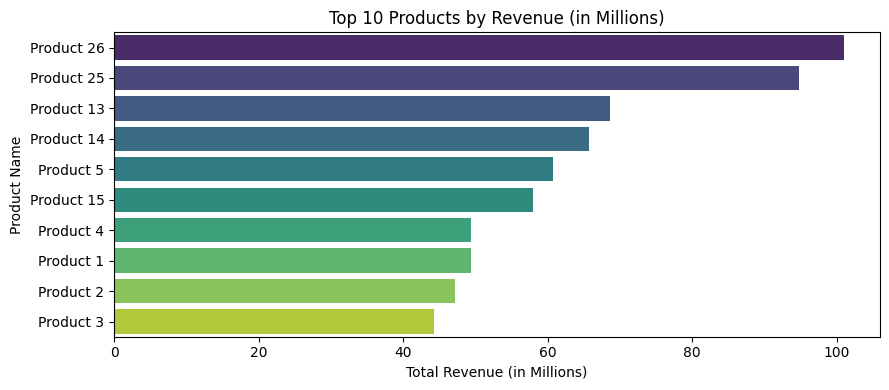

In [204]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000
top_prod = top_prod.nlargest(10)

# Plot
plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    hue=top_prod.index,   # tie hue to y
    palette='viridis',
    legend=False
)

plt.title('Top 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


**Top 10 Products by Avg Profit Margin**

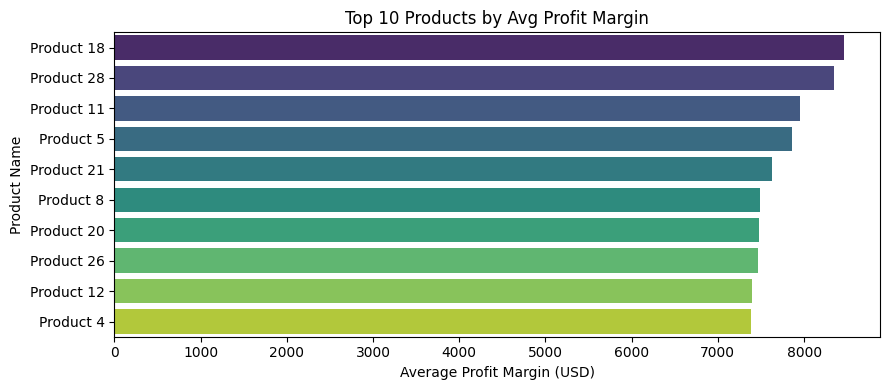

In [205]:
# Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))


sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    hue=top_margin.index,
    palette='viridis',
    legend=False
)

# Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')

# Adjust layout and display
plt.tight_layout()
plt.show()


**Sales by Channel (Pie Chart)**

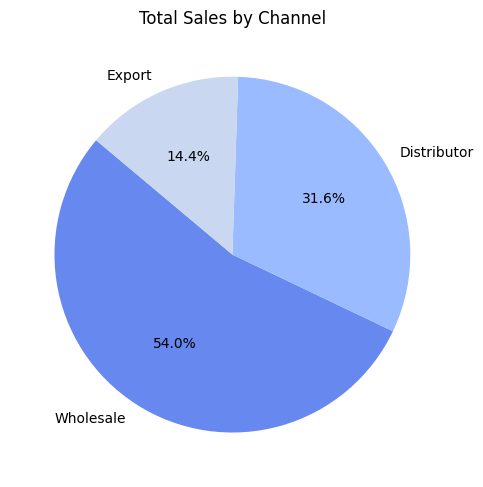

In [206]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)

# Add title for context
plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

**Average Order Value Distribution**

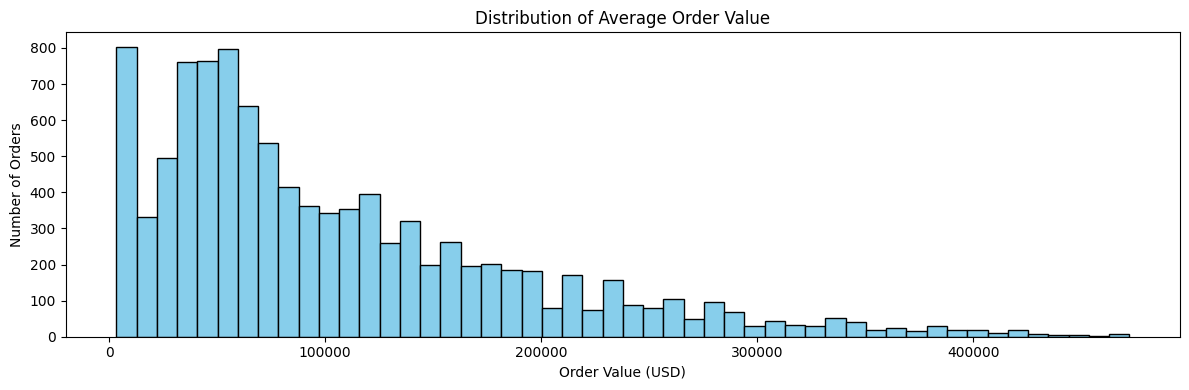

In [207]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

**Total Sales by US Region**

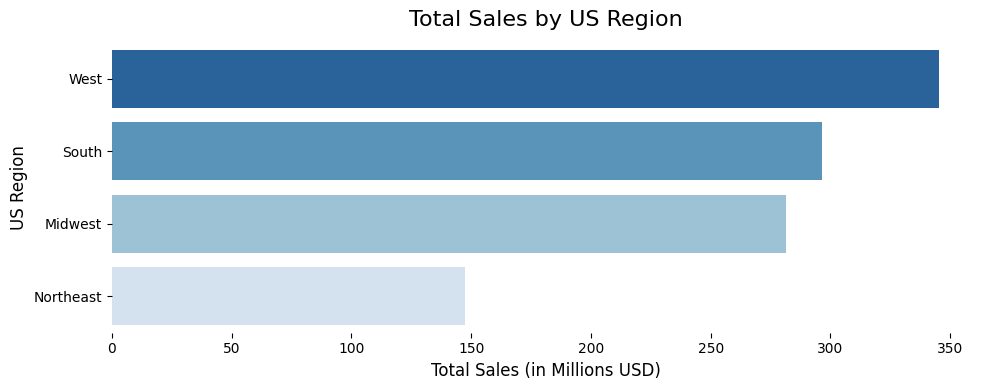

In [209]:
# Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)


plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    hue=region_sales.index,
    palette='Blues_r',
    legend=False
)


plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**Top 10 by Revenue and Order Count**

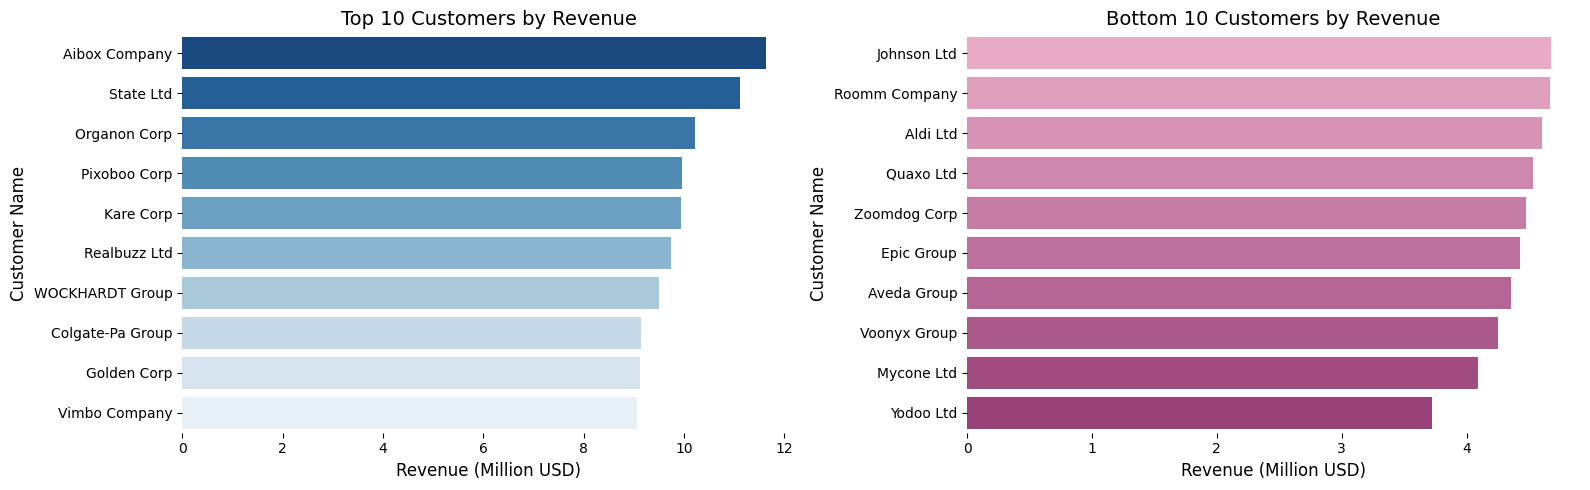

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Calculate total revenue per customer
rev_per_customer = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)


top_rev = rev_per_customer.iloc[:10]
bottom_rev = rev_per_customer.iloc[-10:]   #

custom_pink_palette = LinearSegmentedColormap.from_list(
    "custom_pink", ["#F2A0C4", "#A8337D"], N=10
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (blue gradient)
sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    hue=top_rev.index,
    palette='Blues_r',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

# Plot 2: Bottom 10 customers by revenue (custom purple gradient)
sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    hue=bottom_rev.index,
    palette=[custom_pink_palette(i) for i in np.linspace(0, 1, 10)],
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**Average Profit Margin by Channel**

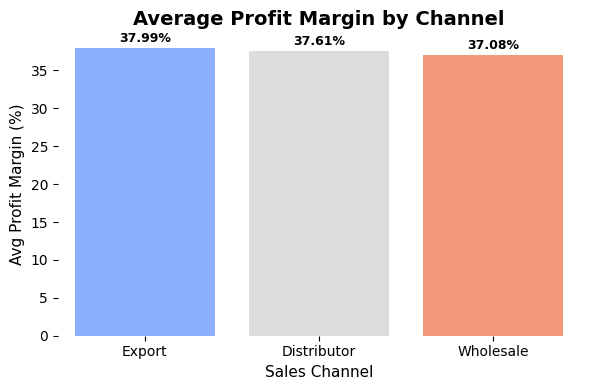

In [211]:
#  Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel', as_index=False)['profit_margin_pct']
      .mean()
      .sort_values(by='profit_margin_pct', ascending=False)
)

plt.figure(figsize=(6, 4))

# Create the bar chart
colors = sns.color_palette('coolwarm', len(channel_margin))
sns.barplot(
    data=channel_margin,
    x='channel',
    y='profit_margin_pct',
    color=None
)

plt.gca().patches[:]

# Apply custom colors to each bar
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])

plt.bar_label(
    plt.gca().containers[0],
    labels=[f"{v:.2f}%" for v in channel_margin['profit_margin_pct']],
    label_type='edge',
    padding=2,
    fontsize=9,
    fontweight='bold'
)

plt.title('Average Profit Margin by Channel', fontsize=14, weight='bold')
plt.xlabel('Sales Channel', fontsize=11)
plt.ylabel('Avg Profit Margin (%)', fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**Top and Bottom 10 Customers by Revenue**

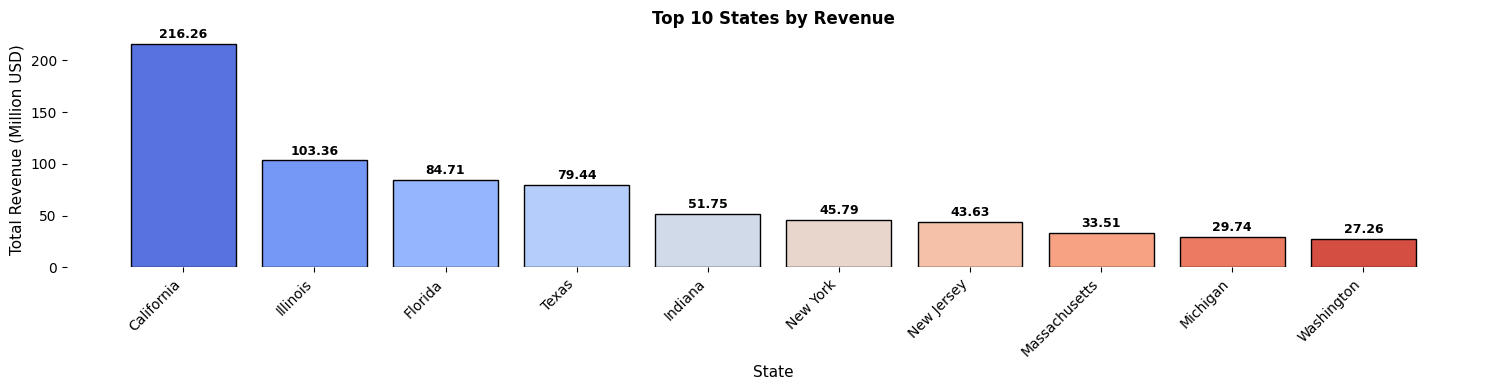

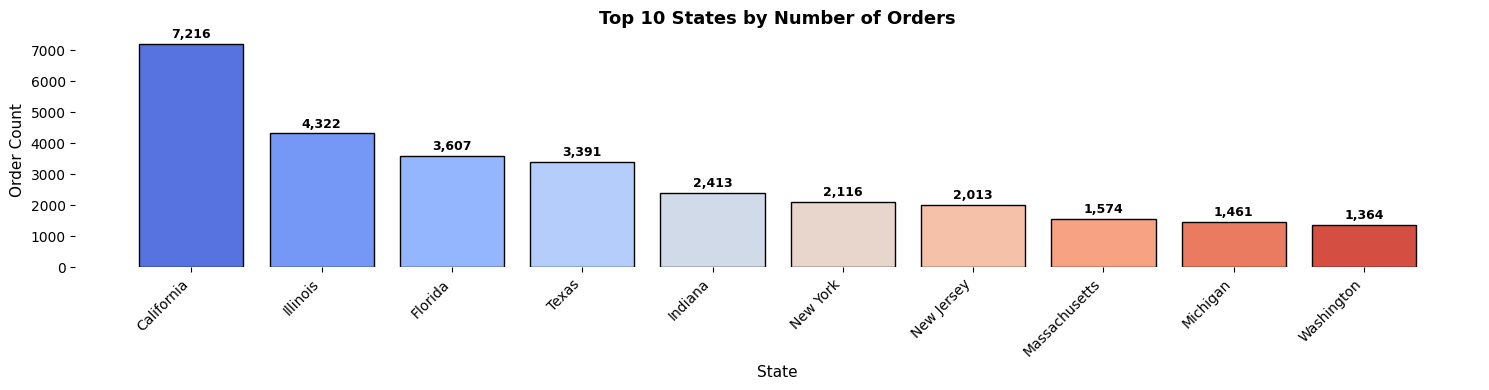

In [212]:
# Aggregate total revenue and unique order count per state
state_rev = (
    df.groupby('state_name')
      .agg(
          revenue=('revenue', 'sum'),
          orders=('order_number', 'nunique')
      )
      .nlargest(10, 'revenue')
      .reset_index()
)


colors = sns.color_palette('coolwarm', len(state_rev))


# Plot 1: Top 10 States by Revenue

plt.figure(figsize=(15, 4))
bars = plt.bar(
    state_rev['state_name'],
    state_rev['revenue'] / 1e6,
    color=colors,
    edgecolor='black'
)

plt.title('Top 10 States by Revenue', fontsize=12, weight='bold')
plt.xlabel('State', fontsize=11)
plt.ylabel('Total Revenue (Million USD)', fontsize=11)
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, labels=[f"{v/1e6:.2f}" for v in state_rev['revenue']], padding=2, fontsize=9, fontweight='bold')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
bars = plt.bar(
    state_rev['state_name'],
    state_rev['orders'],
    color=colors,
    edgecolor='black'
)

plt.title('Top 10 States by Number of Orders', fontsize=13, weight='bold')
plt.xlabel('State', fontsize=11)
plt.ylabel('Order Count', fontsize=11)
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, labels=[f"{v:,}" for v in state_rev['orders']], padding=2, fontsize=9, fontweight='bold')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**Customer Segmentation: Revenue vs. Profit Margin**

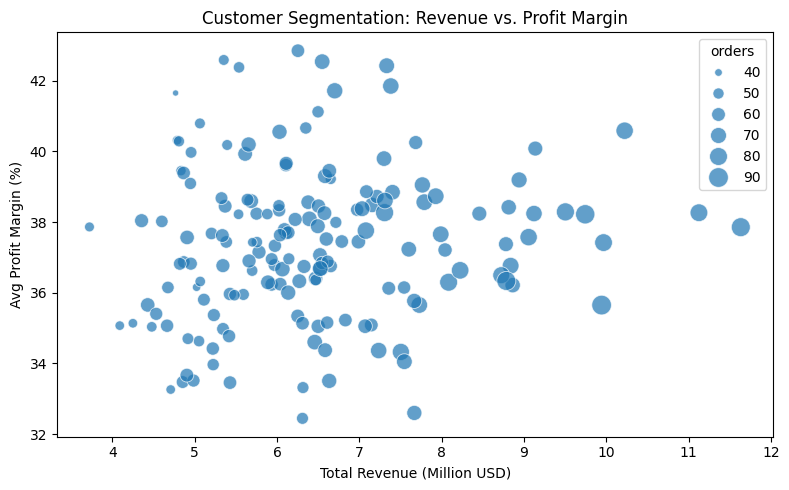

In [214]:
summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
summary['total_revenue_m'] = summary['total_revenue'] / 1e6

plt.figure(figsize=(8, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()
